In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

## 1. Downloading MovieLens-100k Dataset

In [2]:
DATASET_LINK='http://files.grouplens.org/datasets/movielens/ml-100k.zip'

In [3]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -n ml-100k.zip

File ‘ml-100k.zip’ already there; not retrieving.

Archive:  ml-100k.zip


## 2. Loading and Pre-Processing MovieLens Dataset

### Loading u.info

> The number of users, items, and ratings in the u data set

In [4]:
overall_stats = pd.read_csv('ml-100k/u.info', header=None)
print("Details of users, items and ratings in the MovieLens dataset: ",list(overall_stats[0]))

Details of users, items and ratings in the MovieLens dataset:  ['943 users', '1682 items', '100000 ratings']


### Loading u.data

> The full u data set, 100000 ratings by 943 users on 1682 items.
              Each user has rated at least 20 movies.  Users and items are
              numbered consecutively from 1.  The data is randomly
              ordered. This is a tab separated list of 
	         user id | item id | rating | timestamp. 
              The time stamps are unix seconds since 1/1/1970 UTC 

In [5]:
# renaming 'item id' to 'movie id'
column_names_data = ['user id', 'movie id', 'rating', 'timestamp']
df_data = pd.read_csv('ml-100k/u.data', sep='\t', header=None, names=column_names_data)
df_data.head() 

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
len(df_data), min(df_data['movie id']), max(df_data['movie id'])

(100000, 1, 1682)

### Loading u.item

> Information about the items (movies); this is a tab separated
              list of
              movie id | movie title | release date | video release date |
              IMDb URL | unknown | Action | Adventure | Animation |
              Children's | Comedy | Crime | Documentary | Drama | Fantasy |
              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
              Thriller | War | Western |
              The last 19 fields are the genres, a 1 indicates the movie
              is of that genre, a 0 indicates it is not; movies can be in
              several genres at once.
              The movie ids are the ones used in the u.data data set.

In [7]:
column_names_item = 'movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western'
column_names_item = column_names_item.split(' | ')
column_names_item

['movie id',
 'movie title',
 'release date',
 'video release date',
 'IMDb URL',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [8]:
df_items = pd.read_csv('ml-100k/u.item', sep='|', header=None, names=column_names_item, encoding='latin-1')
df_items

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_movies = df_items[['movie id','movie title']]
df_movies.head()

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


### Finding duplicate movie ids using grouping by movie titles

In [10]:
len_original = len(df_items)
len_grouped = len(df_items.groupby(by='movie title'))
print((len_original, len_grouped))
print("Duplicate Movie IDs =", len_original - len_grouped)

(1682, 1664)
Duplicate Movie IDs = 18


### Merging different datasets to get final refined dataset

In [11]:
df_merged = pd.merge(df_data, df_movies, how='inner', on='movie id')
df_merged.head()

,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [12]:
# dropping 'movie id' as it contains 18 duplicates
df_refined = df_merged.groupby(by=['user id', 'movie title'], as_index=False).agg({"rating": "mean"})
df_refined.head()

,user id,movie title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0


## 3. Performing Exploratory Data Analysis

In [13]:
print(df_refined.describe())

            user id        rating
count  99693.000000  99693.000000
mean     462.513366      3.529907
std      266.619991      1.125492
min        1.000000      1.000000
25%      254.000000      3.000000
50%      447.000000      4.000000
75%      682.000000      4.000000
max      943.000000      5.000000


In [14]:
num_users = len(df_refined['user id'].value_counts())
num_items = len(df_refined['movie title'].value_counts())
print('Unique number of users in the dataset: {}'.format(num_users))
print('Unique number of movies in the dataset: {}'.format(num_items))

Unique number of users in the dataset: 943
Unique number of movies in the dataset: 1664


movie title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
dtype: int64


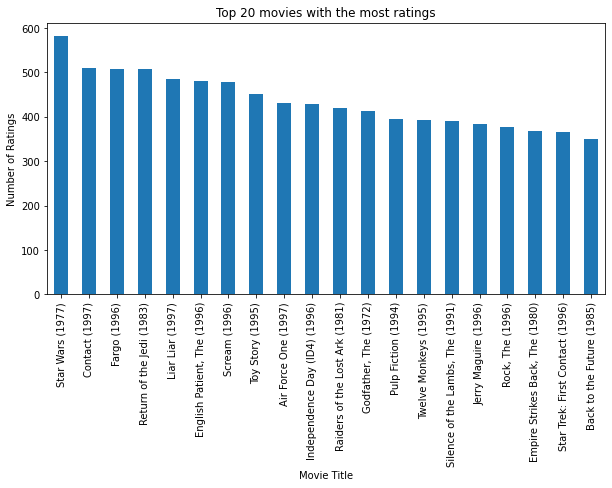

In [15]:
# Plotting movies with most ratings
movie_rating_counts = df_refined.groupby('movie title').size().sort_values(ascending=False)
print(movie_rating_counts.head())

top_n_movies = movie_rating_counts.head(20)
plt.figure(figsize=(10,5))
top_n_movies.plot(kind='bar')
plt.title('Top 20 movies with the most ratings')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.show()


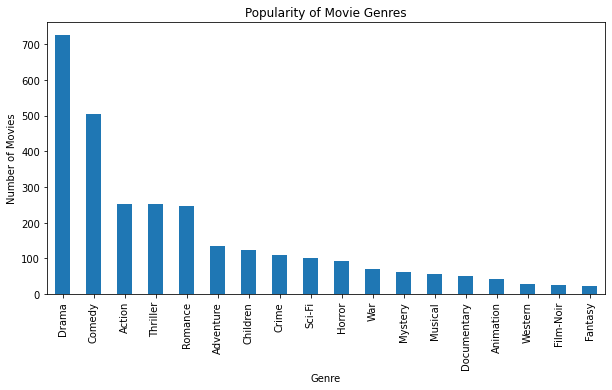

In [16]:
# Plotting genre information
genres = column_names_item[6:]
genre_data = df_items[genres].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
genre_data.plot(kind='bar')
plt.title('Popularity of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

user id
405    736
655    678
13     632
450    538
276    516
dtype: int64


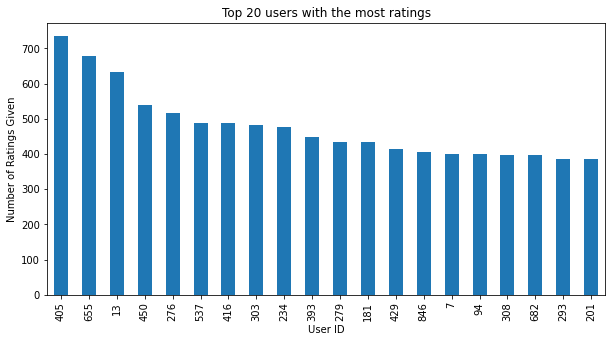

In [17]:
# Plotting users with most ratings
user_rating_counts = df_refined.groupby('user id').size().sort_values(ascending=False)
print(user_rating_counts.head())

top_n_users = user_rating_counts.head(20)
plt.figure(figsize=(10,5))
top_n_users.plot(kind='bar')
plt.title('Top 20 users with the most ratings')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings Given')
plt.show()


In [18]:
df_rating_count = pd.DataFrame(df_refined.groupby(['rating']).size(), columns=['count'])
df_rating_count

,count
rating,
1.0,6083
1.5,3
2.0,11334
2.5,6
3.0,27060
3.5,19
4.0,34042
4.5,16
5.0,21130


Text(0, 0.5, 'Number of Ratings')

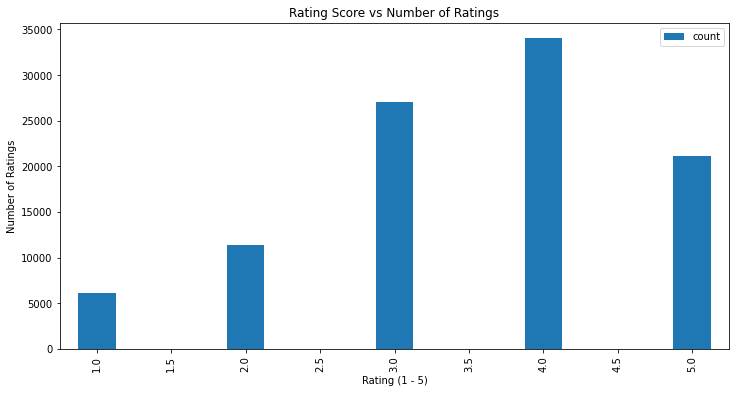

In [19]:
ax = df_rating_count.reset_index().rename(columns={'index': 'rating score'}).plot('rating', 'count', 'bar',
    figsize=(12, 6),
    title='Rating Score vs Number of Ratings')

ax.set_xlabel("Rating (1 - 5)")
ax.set_ylabel("Number of Ratings")

## 4. Modeling using SVD (Single Value Decomposition) / Matrix Factorization

### Creating lists for unique user ids and movie names

In [20]:
# Displaying uniques users and movies
unique_users = df_refined['user id'].unique() 
unique_movies = df_refined['movie title'].unique()
len(unique_movies),len(unique_users)

(1664, 943)

In [21]:
# Creating users & movies lists
users_list = df_refined['user id'].tolist()
movie_list = df_refined['movie title'].tolist()
len(users_list), len(movie_list)

(99693, 99693)

### Creating a list for movie ratings

In [22]:
ratings_list = df_refined['rating'].tolist()
print(ratings_list)
len(ratings_list)

[2.0, 5.0, 3.0, 4.0, 3.0, 3.0, 1.0, 4.0, 4.0, 5.0, 5.0, 1.0, 5.0, 4.0, 5.0, 3.0, 4.0, 2.0, 4.0, 4.0, 1.0, 5.0, 2.0, 3.0, 1.0, 1.0, 1.0, 3.0, 2.0, 3.0, 5.0, 2.0, 4.0, 5.0, 4.0, 5.0, 3.0, 4.0, 5.0, 1.0, 5.0, 4.0, 4.0, 3.0, 3.0, 3.0, 4.0, 5.0, 5.0, 4.0, 4.0, 5.0, 3.0, 3.0, 5.0, 3.0, 3.0, 4.0, 5.0, 5.0, 1.0, 3.0, 5.0, 5.0, 5.0, 4.0, 2.0, 4.0, 4.0, 3.0, 2.0, 4.0, 5.0, 2.0, 5.0, 4.0, 5.0, 1.0, 3.0, 4.0, 5.0, 1.0, 3.0, 4.0, 4.0, 3.0, 1.0, 3.0, 4.0, 3.0, 1.0, 1.0, 5.0, 4.0, 3.0, 4.0, 3.0, 5.0, 5.0, 1.0, 3.0, 2.0, 4.0, 5.0, 4.0, 3.0, 4.0, 3.0, 5.0, 4.0, 5.0, 3.0, 4.0, 5.0, 5.0, 2.0, 5.0, 2.0, 1.0, 5.0, 5.0, 4.0, 5.0, 4.0, 3.0, 3.0, 4.0, 4.0, 4.0, 5.0, 2.0, 2.0, 1.0, 5.0, 3.0, 5.0, 5.0, 1.0, 4.0, 2.0, 4.0, 3.0, 5.0, 3.0, 2.0, 3.0, 3.0, 2.0, 4.0, 5.0, 5.0, 4.0, 3.0, 5.0, 4.0, 5.0, 2.0, 3.0, 4.0, 5.0, 5.0, 5.0, 3.0, 3.0, 1.0, 2.0, 5.0, 2.0, 3.0, 3.0, 5.0, 1.0, 5.0, 4.0, 1.0, 3.0, 3.0, 3.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, 2.0, 5.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 3.0, 5.0, 4.0, 5.0, 4.0, 3.0, 5.0, 4.0,

99693

### Creating mapping for movies with index

In [23]:
movies_dict = {unique_movies[i] : i for i in range(len(unique_movies))}
print(movies_dict)
print(len(movies_dict))

{'101 Dalmatians (1996)': 0, '12 Angry Men (1957)': 1, '20,000 Leagues Under the Sea (1954)': 2, '2001: A Space Odyssey (1968)': 3, 'Abyss, The (1989)': 4, 'Ace Ventura: Pet Detective (1994)': 5, 'Air Bud (1997)': 6, 'Akira (1988)': 7, 'Aladdin (1992)': 8, 'Alien (1979)': 9, 'Aliens (1986)': 10, 'All Dogs Go to Heaven 2 (1996)': 11, 'Amadeus (1984)': 12, 'Angels and Insects (1995)': 13, "Antonia's Line (1995)": 14, 'Apocalypse Now (1979)': 15, 'Apollo 13 (1995)': 16, 'Aristocats, The (1970)': 17, 'Army of Darkness (1993)': 18, 'Austin Powers: International Man of Mystery (1997)': 19, 'Babe (1995)': 20, 'Back to the Future (1985)': 21, 'Bad Boys (1995)': 22, 'Basic Instinct (1992)': 23, 'Batman & Robin (1997)': 24, 'Batman Forever (1995)': 25, 'Batman Returns (1992)': 26, 'Beavis and Butt-head Do America (1996)': 27, 'Bedknobs and Broomsticks (1971)': 28, 'Belle de jour (1967)': 29, 'Big Night (1996)': 30, 'Billy Madison (1995)': 31, 'Birdcage, The (1996)': 32, 'Blade Runner (1982)': 33

### Creating a utility matrix for the available data

In [24]:
# Creating an empty array with rows as movies, columns as users

utility_matrix = np.asarray([[np.nan for j in range(len(unique_users))] for i in range(len(unique_movies))])
print("Shape of the utility matrix:", utility_matrix.shape)

for i in range(len(ratings_list)):
    utility_matrix[movies_dict[movie_list[i]]][users_list[i]-1] = ratings_list[i]

utility_matrix

Shape of the utility matrix: (1664, 943)


array([[ 2., nan, nan, ..., nan, nan, nan],
       [ 5., nan, nan, ..., nan, nan, nan],
       [ 3., nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [25]:
# Normalizing the utility matrix across movies column
mask = np.isnan(utility_matrix)
masked_arr = np.ma.masked_array(utility_matrix, mask)
temp_mask = masked_arr.T
rating_means = np.mean(temp_mask, axis=0)

# Imputing nan's with mean values of ratings
filled_matrix = temp_mask.filled(rating_means)
filled_matrix = filled_matrix.T
filled_matrix = filled_matrix - rating_means.data[:,np.newaxis]

In [26]:
filled_matrix = filled_matrix.T / np.sqrt(len(movies_dict)-1)
filled_matrix

array([[-0.02227217,  0.01608636, -0.01226094, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [27]:
filled_matrix.shape

(943, 1664)

In [28]:
# Computing the SVD of the input matrix
U, S, V = np.linalg.svd(filled_matrix)

In [29]:
movies_list_lowercase = [i.lower() for i in unique_movies]

In [30]:
# Calculating the cosine similarity (sorting by most similar and returning the top N)
def top_cosine_similarity(data, movie_id, top_n=10):
    index = movie_id 
    movie_row = data[index, :]
    magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data))
    similarity = np.dot(movie_row, data.T) / (magnitude[index] * magnitude)
    sort_indexes = np.argsort(-similarity)
    print(sort_indexes[:top_n])
    return sort_indexes[:top_n]

In [31]:
# Getting k-principal components to represent movies (defaults to 50)       
def get_similar_movies(movie_name, top_n, k = 50):
    sliced = V.T[:, :k] # representative data
    movie_id = movies_dict[movie_name]
    indices = top_cosine_similarity(sliced, movie_id, top_n)
    print("Indices:", indices)
    print()
    print("Top " + str(top_n-1) + " movies which are very much similar to - " + movie_name + " are: /n")
    for i in indices[1:]:
        print(unique_movies[i])

### Dynamically suggesting movie name from the existing movie corpus based on the user input

In [32]:
# Returning movie suggestions to the user

def get_movie_suggestions(movie):
    temp = ""
    movie_suggestions = movies_list_lowercase.copy()
    for i in movie:
        suggested_output = []
        temp += i
        for j in movie_suggestions:
            if temp in j:
                suggested_output.append(j)
        if len(suggested_output) == 0:
            return movie_suggestions
        suggested_output.sort()
        movie_suggestions = suggested_output.copy()
        
    return movie_suggestions

In [33]:
def recommender():
    
    try:
        movie_name = input("Input movie name: ")
        movie_name_lower = movie_name.lower()
        if movie_name_lower not in movies_list_lowercase:
            raise ValueError
        else:
            num_recommendations = int(input("Input number of movies to be recommended: "))
            get_similar_movies(unique_movies[movies_list_lowercase.index(movie_name_lower)], num_recommendations+1)

    except ValueError:
        possible_movies = get_movie_suggestions(movie_name_lower)

        if len(possible_movies) == len(unique_movies):
            print("Movie entered does not exist in the dataset...")
        else:
            indices = [movies_list_lowercase.index(i) for i in possible_movies]
            print("This movie name does not match with any movie in the dataset. Please select from the suggestions below:\n", [unique_movies[i] for i in indices])
            print("")
            recommender()


In [35]:
recommender()

Input movie name: top gun
This movie name does not match with any movie in the dataset. Please select from the suggestions below:
 ['Top Gun (1986)']

Input movie name: Top Gun (1986)
Input number of movies to be recommended: 15
[ 245 1290   65  138  987 1468  842  934  727  269 1009  734 1025  261
  663   31]
Indices: [ 245 1290   65  138  987 1468  842  934  727  269 1009  734 1025  261
  663   31]

Top 15 movies which are very much similar to - Top Gun (1986) are: /n
Stripes (1981)
Desperado (1995)
Last of the Mohicans, The (1992)
Big Green, The (1995)
Herbie Rides Again (1974)
Milk Money (1994)
Fox and the Hound, The (1981)
Mallrats (1995)
Young Guns (1988)
Tie Me Up! Tie Me Down! (1990)
Pretty Woman (1990)
Lassie (1994)
When Harry Met Sally... (1989)
Vampire in Brooklyn (1995)
Billy Madison (1995)
